# Lecture 33: Agent-based Simulation

```{note}
This lecture introduces Agent-based Simulation with a disucssion on its key elements, use cases specific to transportation and logistics, different simulation mechanisms, and susbequently emergent behavior from agent interactions. The lecture ends with a minimalist example of Agent-based Simulation with implementation in Python.
```

## Introduction

An Agent-based Simulation (ABS) is a modeling paradigm in which the fundamental building blocks are autonomous agents. Each agent is an independent decision-making entity that can sense its environment—which includes other agents and external conditions—and act according to predefined rules. Importantly, these rules may incorporate adaptation, memory, or learning, enabling agents to change behavior over time in response to experience.

ABS is especially well suited for systems where agents interact naturally with one another and with their environment, such as pedestrians navigating crowds, vehicles adjusting speeds in traffic, or couriers adapting to delivery conditions. It is particularly useful when learning and adaptation play a role—for example, in route choice, compliance with rules, reputation building, or driver repositioning in ride-hailing systems. ABS is also advantageous when movement and decision-making depend on situational awareness and local perception rather than adherence to a predetermined script. Finally, ABS enables exploration of bottom-up dynamics and heterogeneity, allowing researchers to capture behavioral diversity and network effects that are often abstracted away in aggregate or equation-based models.

At its core, an agent can be defined by three components:

- Attributes – static or dynamic characteristics (e.g., location, speed, preferences).

- Behavioral Rules – often expressed as if–then conditions that govern how agents act in different situations.

- Adaptive Mechanisms – optional features such as memory, reinforcement, or learning that allow agents to modify their behavior over time.

By combining these simple components across many agents, ABS provides a bottom-up approach to studying complex systems. It allows researchers to test hypotheses about how micro-level decisions/interactions lead to emergent macro-level patterns in fields as diverse as transportation (e.g., traffic flow, pedestrian movement), economics (e.g., market dynamics), and social sciences (e.g., opinion diffusion). A classic example includes the car-following model in traffic flow theory. Here, each vehicle is treated as an autonomous agent that continuously adjusts its acceleration or deceleration based on the relative speed and headway (distance) to the vehicle in front. The rules may be simple—such as “if the gap closes below a threshold, decelerate”—yet the collective interaction of many such agents produces system-level patterns like stop-and-go waves, shockwaves, or traffic jams. These patterns are not pre-programmed but arise from decentralized, local decision-making, making ABS a natural framework for studying and simulating them. Yet another example pertains to flocking behavior in birds, where individual agents follow basic rules of alignment, cohesion, and separation, yet the collective produces coordinated group movement and flock shape.

```{warning}
Note, while emergence is often cited as a hallmark of ABS, it is not a requirement for its utility. Even without emergent patterns, ABS remains valuable for modeling contexts where agent movement and decisions depend on situational awareness rather than pre-scripted trajectories.
```

## Analogous Modeling Paradigms

While ABS is a powerful tool, it is not the only approach available to study complex systems. Other paradigms offer complementary perspectives and are sometimes preferable depending on the modeling objectives:

- Discrete Event Simulation (DES): ABS is fundamentally a DES in the sense that agent decisions often trigger discrete events—such as arrivals, departures, collisions, or service completions—that change system state. However, DES typically models events as exogenous and system-driven, focusing on process flows and resource utilization, whereas ABS places emphasis on endogenous decision-making by autonomous agents that collectively generate the event dynamics.

- System Dynamics (SD): ABS is fundamentally a SD in that both seek to explain system-level patterns emerging over time from interacting components. However, SD operates at an aggregate level—using stocks, flows, and feedback loops—whereas ABS models behavior at the micro-level of individual agents, enabling representation of heterogeneity, bounded rationality, and adaptation that aggregate SD models often abstract away.

- Game Theory (GT): ABS is fundamentally a GT framework in that agents interact strategically, and outcomes depend on the choices of multiple decision-makers. However, GT assumes rational, utility-maximizing actors and emphasizes equilibrium outcomes, while ABS allows for bounded rationality, incomplete information, heuristics, and learning. ABS can thus capture dynamics far from equilibrium and the adaptive processes by which agents evolve toward (or diverge from) stable states.

Taken together, these paradigms—ABS, DES, SD, and GT—form a toolbox of modeling approaches, each with distinct strengths. ABS shines when heterogeneity, local interactions, and adaptation are central to the dynamics of interest, whereas DES and SD provide structure for process-oriented and aggregate-level analyses, and GT frames explicitly strategic environments.

## Simulation Mechanism

At the heart of an Agent-based Simulation lies an iterative mechanism that governs how agents and their environment evolve over time. The simulation proceeds in discrete time steps (or event-driven updates), during which agents sense, decide, and act. This cycle is repeated until the simulation reaches a predefined end condition such as a fixed time horizon, convergence of system states, or exhaustion of resources.

A generic ABS mechanism can be described as follows:

- Initialization: Define the environment (spatial, network, or abstract), specify agent attributes (e.g., position, speed, preferences), and set initial conditions.

- Perception: At each step, agents gather information from their surroundings, including states of nearby agents and relevant environmental variables.

- Decision-making: Each agent applies behavioral rules, which may include heuristics, optimization routines, or learning algorithms, to determine its next action.

- Action: Agents execute their chosen actions, which update their own state and may affect the environment or other agents.

- Environment update: The environment itself is updated to reflect the consequences of agent actions (e.g., traffic density, queue length, network load).

- Iteration: The cycle repeats, allowing micro-level decisions and interactions to accumulate into macro-level patterns.

This iterative mechanism captures the bottom-up nature of ABS: system-level dynamics emerge not from pre-specified equations but from repeated interactions among heterogeneous agents. In practice, ABS implementations vary in their updating schemes—some use synchronous updating, where all agents act simultaneously at each time step, while others use asynchronous updating, where agents act sequentially in random or rule-based order. The choice of scheme can influence outcomes, particularly when interactions are highly nonlinear.

## Demo: Flocking of Birds

One of the most famous illustrations of agent-based modeling is the flocking of birds, often referred to as the Boids model (originally proposed by Craig Reynolds in 1986). The model demonstrates how simple, local rules followed by individual agents (boids) can generate highly organized, collective patterns at the system level without centralized coordination.

### Problem Definition

We aim to simulate the motion of a flock of birds in a 2D space. Each bird is represented as an autonomous agent (boid) with its own position and velocity. The agents interact only with their local neighborhood—a subset of nearby boids within a certain perception radius. No single bird leads the group; instead, flocking arises purely from decentralized, rule-based decision-making.

Each boid follows three behavioral rules:

- Cohesion (attraction): Steer toward the average position (centroid) of neighboring boids. This captures the tendency of birds to remain part of the group.

- Separation (repulsion): Steer away from nearby boids if they come too close. This prevents collisions and overcrowding.

- Alignment (synchronization): Adjust heading and velocity to align with the average direction of neighboring boids. This produces coordinated group movement.

These rules are evaluated at every time step and combined (usually as weighted vectors) to produce the net steering force for each agent. The new velocity is then used to update the boid’s position.

### Key Features of the Problem

- Local Perception: Each boid has a limited sensing radius and only considers neighbors within that radius.

- Decentralized Control: There is no leader; collective patterns emerge entirely from distributed local interactions.

- Continuous Updating: At each iteration, positions and velocities are recalculated, allowing dynamic flock shapes, splitting, and merging.

- Emergent Behavior: Despite the simplicity of rules, the system exhibits realistic flock dynamics—birds flock together, avoid collisions, and adjust smoothly as a group to obstacles or predators.

### Python Implementation

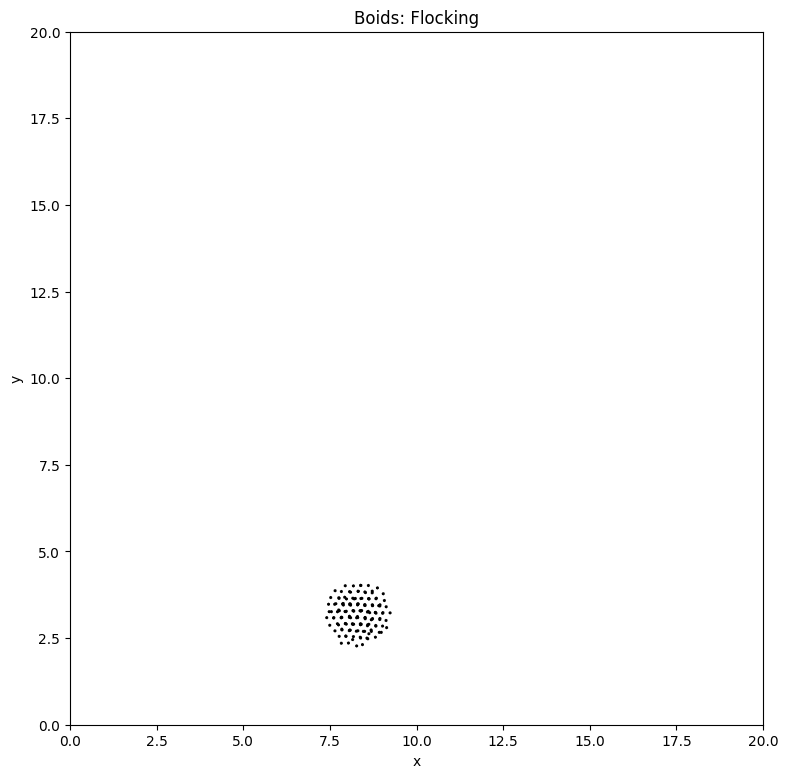

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

rng = np.random.default_rng(5540)

# Parameters
n = 150               # number of agents
w = 20.0              # domain width
h = 20.0              # domain height
r = 2.5               # perception radius
v = 0.35              # maximum speed
c = 0.005             # cohesion weight
s = 0.03              # separation weight
a = 0.05              # alignment weight
x = 0.2               # personal space
k = 1000              # iterations

# Init state
Z = rng.uniform([0,0],[w,h], size=(n,2))
V = rng.normal(0, 0.3, size=(n,2))
S = np.linalg.norm(V, axis=1, keepdims=True) + 1e-9
V = V * np.minimum(0.1, v / S)

def torus_delta(P, a):
    D = P - a                                       # relative positions
    D[:,0] = (D[:,0] + w/2) % w - w/2               # wrap around x
    D[:,1] = (D[:,1] + h/2) % h - h/2               # wrap around y
    return D

def step(Z, V):
    Vn = V.copy()
    for i in range(n):
        D = torus_delta(Z, Z[i])                    # relative positions
        L = np.linalg.norm(D, axis=1)               # distances to all agents
        F = (L > 0) & (L < r)                       # find neighbors within perception radius
        if not np.any(F):
            continue

        P = np.where(F)[0]                          # indices of perceived neighbors

        # Cohesion: steer toward neighbors' centroid
        Vc = D[P].mean(axis=0)                      # cohesion vector

        # Separation: steer away if too close
        X  = P[L[P] < x]                            # close neighbors
        Vs = -D[X].sum(axis=0) if len(X) else 0.0   # separation vector

        # Alignment: match neighbors' average velocity
        Va = V[P].mean(axis=0) - V[i]               # alignment vector

        Vd = c * Vc + s * Vs + a * Va               # steering velocity
        Vn[i] += Vd                                 # update velocity

    # Limit speed
    S = np.linalg.norm(Vn, axis=1, keepdims=True) + 1e-9
    Vn = Vn * np.minimum(1.0, v / S)

    # Update positions with torus wrapping
    Zn = (Z + Vn) % [w, h]
    return Zn, Vn

# Simulate
def simulate(Z, V, k):
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Initialize a quiver plot (arrows) showing agent positions (Z) and velocities (V)
    qv = ax.quiver(
        Z[:,0], Z[:,1], V[:,0], V[:,1],
        angles='xy', scale_units='xy', scale=1
    )
    
    # Set domain limits (world size)
    ax.set_xlim(0, w); ax.set_ylim(0, h)
    ax.set_aspect('equal', adjustable='box')  # keep equal aspect ratio
    ax.set_title("Boids: Flocking")
    ax.set_xlabel("x"); ax.set_ylabel("y")

    # Simulation loop
    for _ in range(k):
        # Update agent positions and velocities for one step
        Z, V = step(Z, V)
        
        # Update the quiver plot with new positions and directions
        qv.set_offsets(Z)               # update arrow positions
        qv.set_UVC(V[:,0], V[:,1])      # update arrow directions
        
        # In Jupyter: clear the previous frame and display the updated one
        clear_output(wait=True)
        display(fig)
        
        # Pause briefly so the UI has time to redraw (smooth animation)
        plt.pause(0.001)

    # Close the figure to avoid leaving a static final frame behind
    plt.close(fig)
    return Z, V

Z, V = simulate(Z, V, k)

### Quantifying Emergent Behaviour in Flocks

Through the interaction and decision-making of individual birds, we can study several emergent properties of the flock as a whole. Key statistical metrics include:

- **Centroid Position and Speed:**  
  Track the center of mass of the flock and its velocity over time. This reveals whether the group stabilizes into a coherent moving unit.

- **Number of Clusters (Fragmentation):**  
  Identify how many distinct sub-flocks form using clustering methods (e.g., DBSCAN). This measures splitting and merging dynamics.

- **Polarization (Alignment):**  
  Quantify the degree of velocity alignment across all birds, from 0 (random) to 1 (perfectly aligned). High polarization indicates strong coordinated motion.

- **Cohesion (Spatial Compactness):**  
  Calculate the average distance of birds from the flock centroid, or the radius of the minimal enclosing circle. This reflects how tightly the flock stays together.

- **Nearest-Neighbor Distances (Separation):**  
  Study the distribution of distances between each bird and its closest neighbors to evaluate collision avoidance and personal space maintenance.

- **Velocity/Heading Variance:**  
  Assess the variability in direction and speed across the flock. Declining variance signals stronger consensus dynamics.

These metrics help us move beyond visual inspection of flocking and provide quantitative insight into how simple local rules give rise to complex, system-level behaviour.

```{tip}
**Extension to Metaheuristics: Particle Swarm Optimization (PSO)**  

The flocking model provides more than a natural demonstration of emergence—it also inspires optimization algorithms. Particle Swarm Optimization (PSO) borrows directly from the principles of flocking and schooling. In PSO, each particle is treated as an “agent” exploring a multidimensional search space.  

- **Cohesion** maps to attraction toward the global best solution found by the swarm.  

- **Alignment** maps to particles adjusting their trajectory based on their own past best performance.  

- **Separation (or randomness/diversity)** helps maintain exploration and avoid premature convergence.  

Much like birds flocking without a leader, particles in PSO adjust their movement using only local and global feedback, and yet the swarm collectively converges toward high-quality solutions. This illustrates how simple agent-based rules can be generalized into powerful metaheuristic search strategies for solving complex optimization problems.
```

---

```{note}
In the next lecture, we will explore car-following models from the perspective of Agent-based Simulation.
```